# From Biological to Artificial Neurons

## Biological Neruons & Logical computations
The artificial neural networks were first proposed based on the model of neurons b/c, as Pitts showed, just a few nuerons w/ binary input and output are able to capture a vast number of logical operations. 

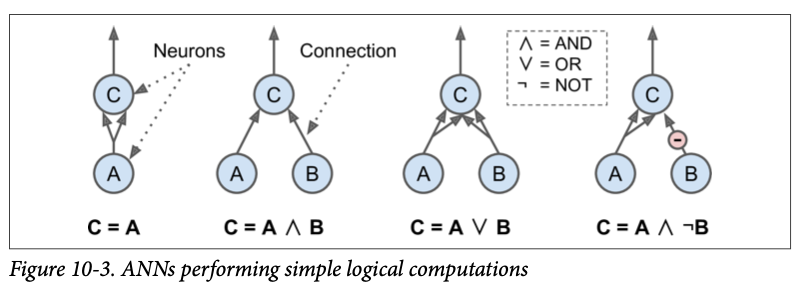

## The Perceptron

One of the simplest ANN architecture based on artifical neuron called threshold logic unit (TLU) or linear threshold unit (LTU) -> the inputs and outputs are now numbers instead of binary values + each input connection is associated with a weight. TLU computes a weighted sum of inputs:
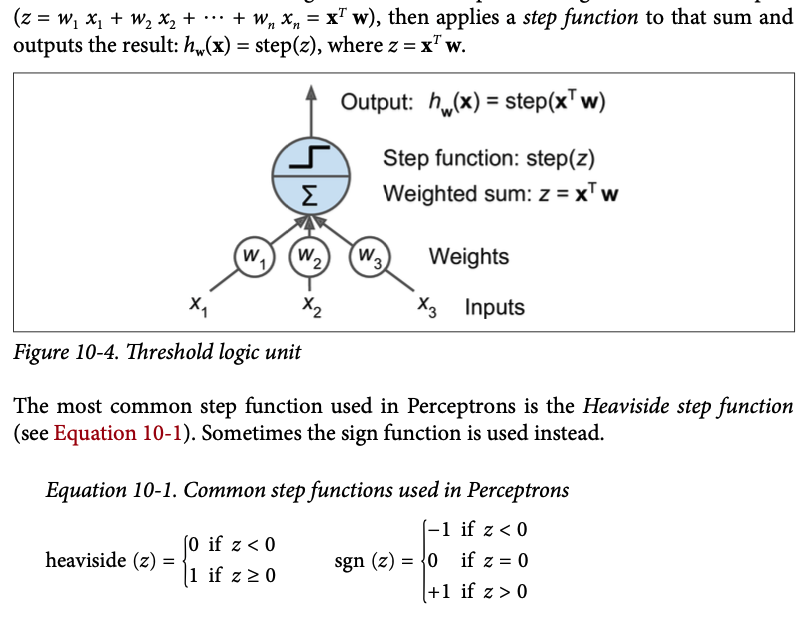

A single TLU can be used for simple linear binary classification. It computers a linear combo of inputs and if the result exceeds a threshold, it outputs a postive or negative class --just like log regression or lienar SVM. (e.g. you can classify iris flower based on petal length and width. Training a TLU in this case meansf indign the right values for the weights --training algo will be discussed soon. 

Perceptron is composed of a single layer of TLUs connected to all the inputs. When all the neurons in a layer are connected to every neuron oin the previous layer (input neurons), it is called fully connected layer or dense layer. All the input neurons togehther form the input neurons. An extra bias feature is generally added (x<sub>0</sub>=1) which represents a special type of neuron called a bias neuron -> always outputs 1. The following perceptron can simultaneously classify instances into thre different binary classes, making it a multi-output classifier. 
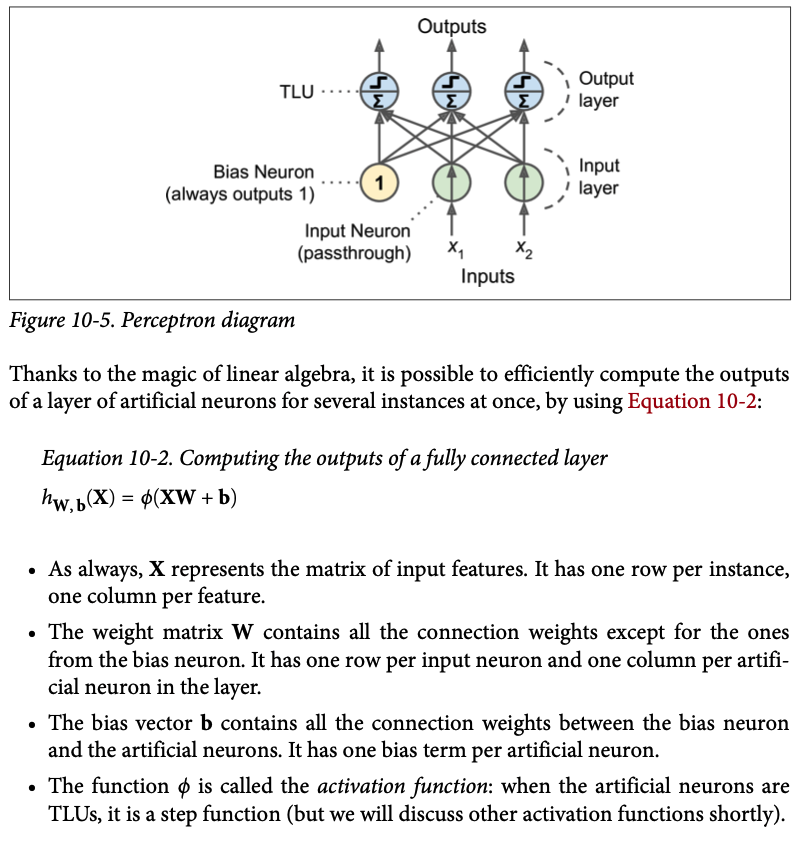

How is Perceptron trained? 

The perceptron is fed one training instance, and for each isntance it makes its predictions. For every outptu neuron that produces a wrong prediction, it reinforces the connection weights from the inputs tat would have contributed to the correct prediction. See the equation below --think of it as a constantly updating eqn based on the previous outputs:

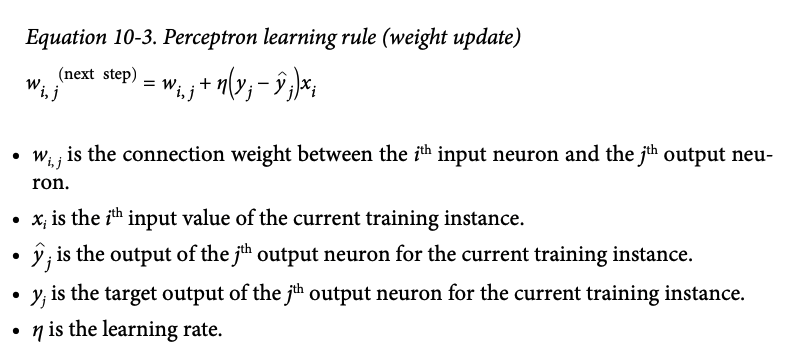

The decision boundary of each output neuron is linear, so perceptron are incapable of learning complex patterns (just like log regression). But if the training instances are linearly separable, Rosenblatt demonstrates this algo will converge to a solution --this is called perceptron convergence theorem. 

sklearn provides a perceptron class that implements a single TLU network. Below we use it:


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Checking to see if it's Iris Setso

per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

Notice that the Perceptron learning algo is similar to Stochastic Gradient Descent. the scklearn perceptron class is equivalent to using the SGDClassifier with the following hyperparam: loss = "perceptron", learning_rate = "cosntant", eta0=1 (learning rate), and penalty = None (no regularization)

contrary to log regression classifiers, the perceptrons do not output a class probability. Another draw back was that percpetrons were not able to solve trivial problems like Exclusive OR (XOR) classification problems. But, turns out that you can elminate many of these problems stacking multiple Perceptrons. The result is a Multi-Layer Perceptron (MLP). 

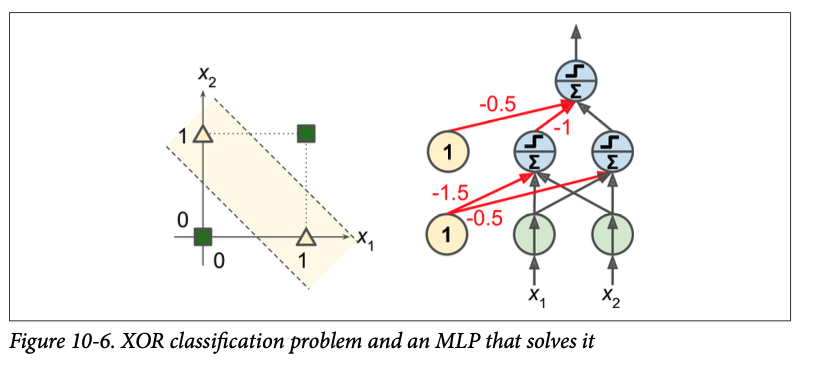

## Multi-Layer Perceptron and Backpropagation

MLP is composed of one (passthrough) input layer, one or more layers of TLUs --called hidden layers-- and one final layer of TLUs called the output layer. 

Layers close to the input laayer are called lower layers, ones closest to output layer are called upper layers. 

Every layer except the output layer has a bias neuron and is fully connected to the next layer. sine th signal flows only in one direction (from inputs to the outputs), this architechture is a called feedforward neural network (FNN). 

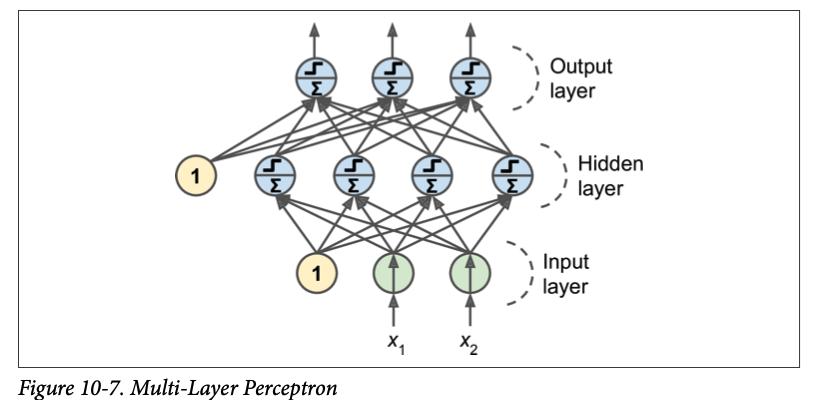

When the ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). Deep learning studies invovle analyzing DNNs and more generally models that contain deep stacks of computations. But, many people talk about Deep Learning whenever neural networks are involved (even shallow ones). 

For many years, ppl struggled to find ways to train a MLP. But in 1986, Geoffrey Hinton published a paper introducing backpropagation training algo, which is still used today. 

In short, it is simply gradient descent using an efficient technique for computing the graident automatcially: 
In just two passes through the network (one forward and one backward), the backpropagation algo is able to compute the gradient fo the network's error w/ regards to eery single modle paramter. I.e. it can find out hwo each connection weight and each bias term should be adjusted in order to reduce th error. Once it has the gradients, it jsut performs a regualr Grad descent step, and the whole process repeates until the network converges to sol'n.

note: automatically computing gradients is called autmoatic differentiation or autodiff. There are various autodiff techniques w/ diff trade-offs. The one that uses backpropagation is called reverse-mode autodiff. It is fast and precise and well suited to differentiate many variables (connection weights) and few outputs (one loss).

Here is a concise summary of this algo in more detail: 

* Handles one mini-batch at a time (e.g., 32 instances each) and goes thru the full trianing set multiple times. EAch pass is called an epoch. 

* Each mini-batch is passed to the network's input layer, which sends it to the first hidden layer. The algo then computes the ouput of all the neurons from this layer. The results is passed to the next layer and so on until you get the output of the last layer, the output layer. This is the forward pass --it is exactly like making predictions, except all the intermediate results are preserved since they are needed for the backward pass. 

* Next, algo measures the network's output error (i.e., uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

* Then, measures how much each output connectioin cotributes to the error. The is done analytically by applying the chain rule --the most fundamental rule in calculus-- which makes this step fast and precise. 

* The algo then measures how much of the error contributions came from each connection in layer below --again using the chain rule-- and so on until the algo reaches the input layer. The reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name). 

* Finally, gradient descent is used to tweak all the connection weights in hte network, using the error gradients it just computed.

note: It is important to initialize all the hidden layers' connection weights randomly, or else trainig will fail. E.g. if you initialize all weights and biases to zero, all the neurons in a given layer will be perfectly identical and thus backprop will affect them in the exact same way. Randomly initializing the wegihts will break the symmetry and allow backprop to triana diverse team of neurons. 

For the algo to work properly, the authors maden a key change to the MLP architectur: they replaced the step function w/ the log function b/c the step contains only flat segmeents, so there is no gradient to work with -- grad descent cannot move on a flat surface, while the log fucntion has well-defined nonzero derivative everywehere --this allows progress to be made at each step. The backprop algo can actually work well with many other activation functions, not just log function: 

* The hyperbolic tangent fucntion --s-shaped, continuous, and differentiable. But output values range from -1 to 1 (insteaad of 0 and 1 like log reg) which tends to make each layer's output centered around 0 at the beginning of training. This helps speed up convergence. 

* The rectified linera unit function: ReLU(z) = max(0,z)--It is continuous but not differntiable at z = 0. But, in practice, it works well and has the advantage of being fast to compute. More importantly, it doesn not have a max output vale which helps reduce some issues during gradient descent. 

note: biological neurons seem to implement a sigmoid (s-shaped) activation function, so researchers stuck to sigmoid functions fro a V long time. But, it turns out that the ReLU generally works better in ANNs. This is one case where the analogy was misleading. 

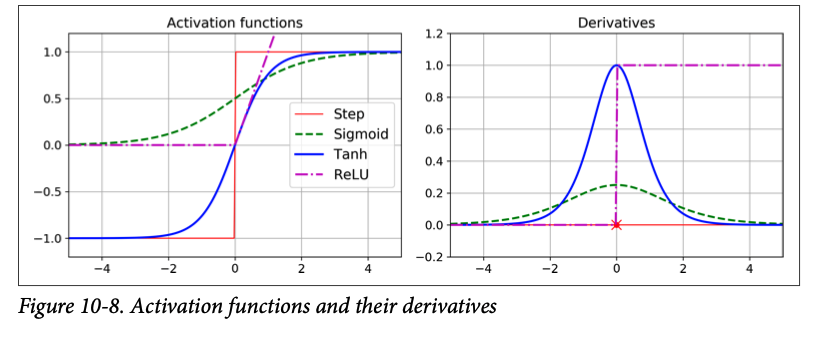

Okay, so you learned the background of where neural networks came from, what their architecture is, and how to compute their outputs, you also learned about the backprop algo --but what can you do with them? 


## Regression MLPs

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g. price of a house given differnt features) then you need a single output neuron: the output is the predicted value. For multivariate regression (i.e. predicting multiple values at once) you need one output neuron per output dimension. 

E.g. if you wan to to locate the center of an object on an image, you need two output neurons (2D coordinates). I you want to place a boudning box around the object, then you need two more numbers: the width and the height of the object -> you end up with 4 output neurons. 

You generally don't want to use any activation function for the output neruosn, so they can freely output any range of values. But, if you want to guarentee that the output will always be positive, then you can use the ReLU activation function or softplus activation function in the output layer. If you want to guarentee the predictions fall within a range, you can use the log function ro the hyperbolic tangent and scale the labels to the appropriate range: 0 to 1 for logistic or -1 to 1 for hyperbolic tangent.

The loss function used during training is usually the maen square error, but if you have a lot of outlieres in the trianing set, you may prefer to use the mean absolute error instead. Or you can use the Huber loss -- a combo of both. 

note on huber: The huber loss is quadratic when the error is smaller than a threshold δ --typically 1-- but linear when the erorr is larger than δ. This makes it less sensitive to outliers tha the mean sq error, andit is often more precise and converges faster than the mean absolute error. 

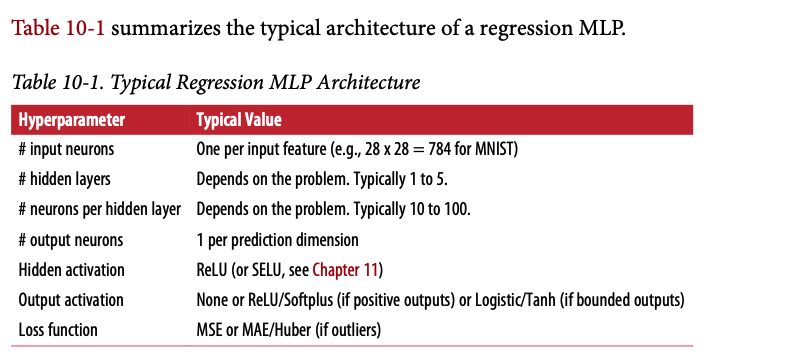

## Classification MLPs

MLPs can be used for classification tasks too. For a binary classification, you just need a single output neuron using the log activation function: output will be a number btw 0 and 1 --which you can interpret as estimated proba of the positive class. 

MLPs can easily do multilabel binary classification tasks too. E.g., you can have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predict whether it is urgent or not --you would need two output neurons that both use log activation function in this case. 

If each instance can only belong to a single class, out of 3+ possible classes (e.g. classes 0-9 for digit image classification), then you need to have one output neuron per calss. You should also use the softmax activation function for the whole output layer. Softmax function will ensure that all the estimated proba are btw 0 and 1 and they add up to 1 (which is required if classes are exclusive). this is called multiclass classification.


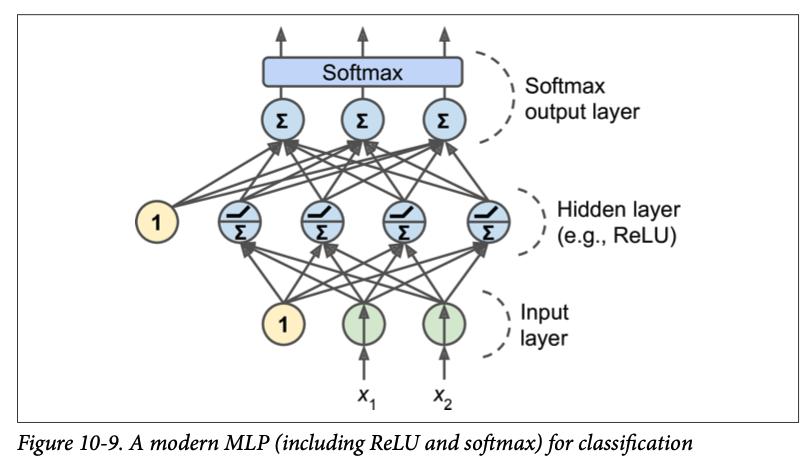
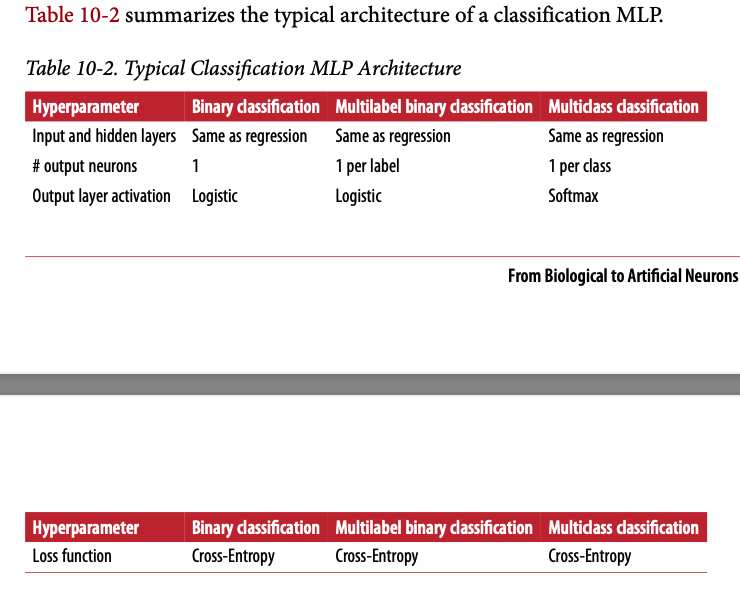

# Implementing MLPs with Keras 

Keras is a high level Deep Leanring API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. The documentation is available at [https://keraas.io](https://keraas.io) . You can choose from three popular open source deep learning libraries: TensorFlow, Microsoft cognitive Toolkit (CNTK) or Theano. 

TensorFlow now comes bundled w/ its own Keras implementation calld tf.keras. It only supports TensorFlow as teh backend, but it has advantage of offering extra features like TensorFlow's Data API which makes it easy to load preprocessed data efficiently. Hence, in this book we use tf.keras. 

## Installin TensorFlow 2





In [3]:
# terminal command to download keras and tensorflow
!pip install keras 
!pip install tensorflow 

You should consider upgrading via the '/Users/caleboh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/caleboh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [18]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.7.0'

## Building an image classifier using the sequential API

First, we load dataset. We will tackle Fashion MNIST which is a replacement of the MNIST --it has the exact same format as MNIST (70,000 grayscale iamges of 28x28 pixels each w/ 10 classes), but images represent fashion items instead of handwritten digits. 

### Using Keras to Load the Dataset

Keras provides utility functiosn to fetch and load common datasets. Let's load Fashion MNIST.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

NameError: name 'keras' is not defined

When loading MNIST or Fashion MNSIT using Keras rather than SKlearn, one important difference is that every image is rep as a 28x28 array rather than a 1D array of size 784. the pixel intensities are rep as integers (from 0 - 255) rather than floats (from 0.0 - 255.0).  

In [13]:
# shape and data type of training set:

X_train_full.shape


(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

The dataset is already split into a training set and a test set, but there is no validation set. Let's creaete one. Since we are going to train a neural network using Gradient Descent, we need to scale the input features. For simplicity, we just scale the pixel instensities down to 0-1 range by dividing them by 255.0 (this also converts them to floats). 

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

W/ MNIST, when the label is equal to 5, it means the image rep the handwritten digit 5. However, for Fashion MNIST, we need the list of class names to know what we are dealing with: 


In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
# E.g. the first image in the training set rep a coat:

class_names[y_train[0]]

'Coat'

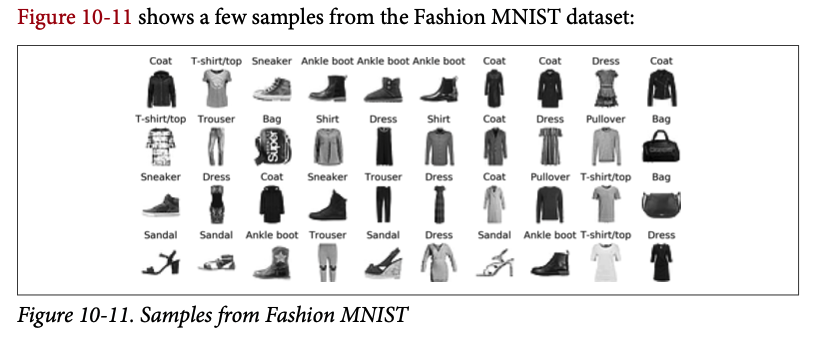

## Creating the Model using the sequential API

Now let's build the neural network! Here is a classification MLP w/ two hidden layers: 


In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

Let's explain the code line-by-line:

* The first line creates a sequential model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API. 

* Next, we build the first layer and add it to the model. It's a flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1,1). This layer has no parameters, it is jsut there do do simple preprocessing. Since it's the first layer in the model, you should specify the input_shape: doesn't include the batch size, only the shape of the instances.

* Next, we add a Dense hidden layer w/ 300 neurons. It uses the ReLU activation fucntion. Each Dense layer manages its own weight matrix, containing all the connection weights btw the neruons and theire inputs. It also manages a vector of bias terms (one per neuron). When it receives input data, it computes eq'n 10-2. 

* Next, we add a second Dense hidden layer w/ 10 neurons (one per calss) using the softmax funcdtion (since th classes are exclusive). 

note: specifying activation = "relu" is equivalent to activation = keras.actvation.relu. Other activation fucntions are available at keraas.activations package. 

Instead of adding the layers one by one like we did, you can just pass a list of layers when creating the Sequential model:


In [20]:
model = keras.models.Sequential([
   keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

Model's summary() method displays the model's layers, including layer's name, output shape, and number of paramters. 

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Notice how the dense layers have a lot of parameters. For example, the first hidden layer has 784 x 300 connection weights + 300 bias terms -> 235,500 total parameters! 

The model gives a lot of flexibility to fit the data, but runs the risk of overfitting, especially when there is not a lot of training data. 


In [32]:
# You can easiily get a model's list of layers to fetch it by index or by name

model.layers

In [33]:
model.layers[1].name

'dense_3'

In [34]:
model.get_layer('dense_3').name

'dense_3'

All the parameters of a layer could be accessed using its get_weights() and set_weights() method:

In [37]:
weights, biases = hidden1.get_weights()
weights

weights.shape
baises
biases.shape

NameError: name 'hidden1' is not defined

Notice the dense layer inititalized the connection weights randomly --which is needed to break symmetry-- and the biases were intiialized to zero. If you ever want to use a diff intialization method yuo can set kernel_initializer or bias_initialzier when creating the layer. 

Teh sahpe of the weight matrix depends on number of inputs. Hence, it is sugggested to specify ipnut_shape when creating the first layer in a sequential model. 

### Compiling the Model

After creating the model, you must call copmile() to specify the loss function and the optimizer to use. You can also specify a list of extra metrics to compute during trianing and evaluatio:


In [41]:
model.compile(loss = "sparse_categorical_crossentropy",
            optimizer = "sgd",
              metrics = ["accuracy"])

Let's explain this code!

We use the "sparse_categorical_crossentropy" loss since we have sparse labels (for each isntance there is just a target class index from 0 to 9), and the classes are exclusive. In the case of binary classification, we would modify this parameter accordingly. 

Secondly, we use the optimizer "sgd" to trrain using simple Stochastic Gradient Descent. I.e., Keras will perform backpropagation algo described earlier. 

Lastly, since this is a classifier, we need a useful measure of performace/accuracy.

### Training and Evaluating the Model

Now, the model is ready to be trained. WE pass in theh input features (X_train) and the target classes (y_train) and the number of epochs that we want (default is just 1, which is clearly not enough). We can also pass a validation set (optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch --V useful to see how well the model really performs/detects overfitting.

In [42]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7241 - accuracy: 0.7609 - val_loss: 0.5205 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4842 - accuracy: 0.8310 - val_loss: 0.4492 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8443 - val_loss: 0.4102 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4144 - accuracy: 0.8545 - val_loss: 0.3980 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8608 - val_loss: 0.4045 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8671 - val_loss: 0.3871 - val_accuracy: 0.8648
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8707 - val_loss: 0.3656 - val_accuracy:

Cool, you trained a neural network. At each epoch during training, several metrics are displayed:
1. the number of instances processed so far (w/ a progress bar)
2. mean training time per sample
3. Loss & accuracy (or other extra metrics you ask for), both on the training and validation sets

You see that 89.02% accuracy was achieved after 30 epochs, not far from the training accuracy, hence does not seem to be much overfitting. 

note: instead of passing in a validation set, you can use the valideation_data arg, and instead set validation_split to the ratio of the training set that you want Keras to use for validation (e.g., 0.1)

IF training set is V skewed, w/ some classes being overrepresented and some under, it would be useful to set the class_weight argument when calling the fit() method, giving more weight to the under-represented classes. 



The fit() method returns a History object that shws the training parameters (history.params), teh list of epochs it went thru (history.epoch) and the most importantly a dictionary (history.history) which ahs teh loss and extra metrics it measured at the end of each epoch on the training and validation set. If you create a pandas dataframe using teh dictionary and call its plot() method, you can get the learning curves shown below: 

NameError: name 'plt' is not defined

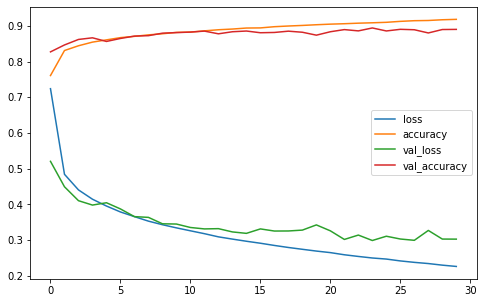

In [43]:
import pandas as pd 

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

### Things to notice about performance:
You can see that training and validation accuracy increase during training, while the training and validation loss decrease. Plus, the validation curves are close to the training curves which means we don't have to worry too much about overfitting.

You can tell that the model has not quite converged yet, as the validation loss is still going down --you should prob continue training. It is as simple as calling the fit() method again --since Keras just continues training where it left off (you should be able to get close to 89% validation accruacy).

If you still aren't satisfied with the performance of your model, you can go back and tune hyperparameter (e.g., # of layers, # of neurons per layer, type of activation functions we use for each hidden layer, # of training epochs, batch size. We will go back to this topic at the end of the chapter. 

Once you are satisfied with the model's validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy model to production. You can do this using the evaluation() method:

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.1546 - accuracy: 0.8594


[56.154605865478516, 0.8593999743461609]

Remember from CH2, it is commmon to get slightly lower performance on the test set than on the validation set b/c the hyperparameters are tuned on the validation set, not the test set --remember to resist the temptation to tweak the hyperparameters on the test set, or else you estimate the generalization to be too optimistic. 

### Using the Model to make predictions

We can now use the model's predict() to make predictions on the new instances. Sine we don't actually have new instances, we will just use the first 3 instances of the test set: 


In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the model predicts onen prob per class from class 0 to 9. E.g., for th first image it estmiates the proba for class 9 (ankle boot) is 79% --actually for us, it just rounds to 100%. The second item is predited as class 3, and the third item is predicted as class 2. 

You can also use th predict_classes() method:


In [57]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [58]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [59]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Now you know how to build, train, evaluate and use a classification MLP using the Sequqential API. Let's now move onto running regressions. 

## Building a Regression MLP Using the Sequential API

Let's use the California housing data to demonstrate using a reegression neural network. We will use sklearn's fetch_california_housing() function to load the data: this data is simpler than what we used in Ch2 since it only has the numerical type features & no missing values.

After loading the data, we split it into a training set, a validation set, a test set, and we scale all the features:


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid) 
X_test_scaled = scaler.transform(X_test)

Building, training, evaluating a regression MLP using the Sequential API to make predictions is similar to what we did for classification. The main diff is that the output layer has a single neuron -- b/c we only want to predict a single value. It also uses no activation function, and the loss function, and the loss funciton is the mean squared error. 

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 954us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 921us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 895us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 936us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 889us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 887us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 903us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 909us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [======================

As you could see, the Sequential API is easy to use. But, even tho sequential models are V common, it is sometimes useful to build neural networks w/ more complex topologies, or w/ multi inputs or outputs. For this, Keras offers the Functional API. 

## Building Complex Models Using the Functional API

One type of non-sequential neural network is the Wide and Deep Neural network (see schema below). 
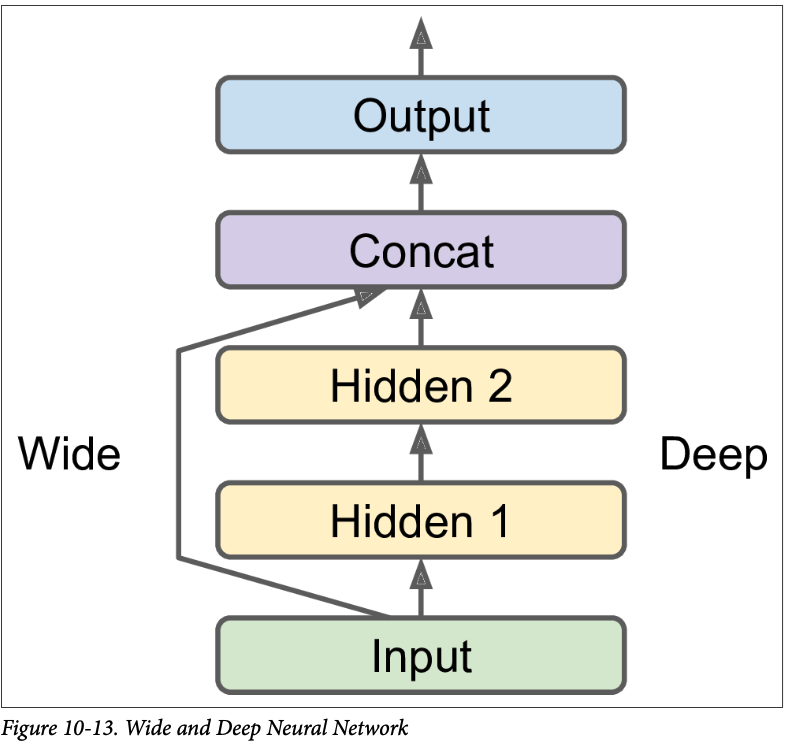

This network architecture connects all or part of the input directly to the output layer. It also makes it possible for the network to learn both deep patterns (usign the deep path) and simiple rules (using the short path). This method is in contrast to the regular MLP, which forces all data to flow through the full stack of layers.

In [67]:
# Let's build a Wide and Deep Neural Network on the Cali data!

input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.model.Model(inputs = [input], outputs = [output])

TypeError: Inputs to a layer should be tensors. Got: <keras.layers.merge.Concatenate object at 0x7fe58a83ddc0>

Let's go thru each line of this code:

1. first, we crreate an input object --this allows us to have multiple inputs, as we'll see later. 

2. Next, we create a dense layer w/ 30 neurons and use the ReLU activation function. Notice that we call it like a function, passing it the input --hence the name Functional API. We are just telling Keras how it should connect the layers togehter, no actual data is being processed yet. 

3. Then we create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer. 

4. Next we create a concatenate() layer, and once again we use it as a function to concatenate the input and output of the second hidden layer. 

5. Then we make the output layer w/ a single neuron and no activation function. We call it like a function by passing it the result of the concatonation. 

6. Finally, we create a Keras Model, specifying inputs and outputs to use. 

Once the model is built, everything is the exact same as earlier --you must compile the cmode, train it, evaluate it and use it to make predictions. 

You can also snd a subset of the features through the wide path and a different subset through the deep path:


In [4]:
import keras

input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output])

You can create a network that has multiple inputs.

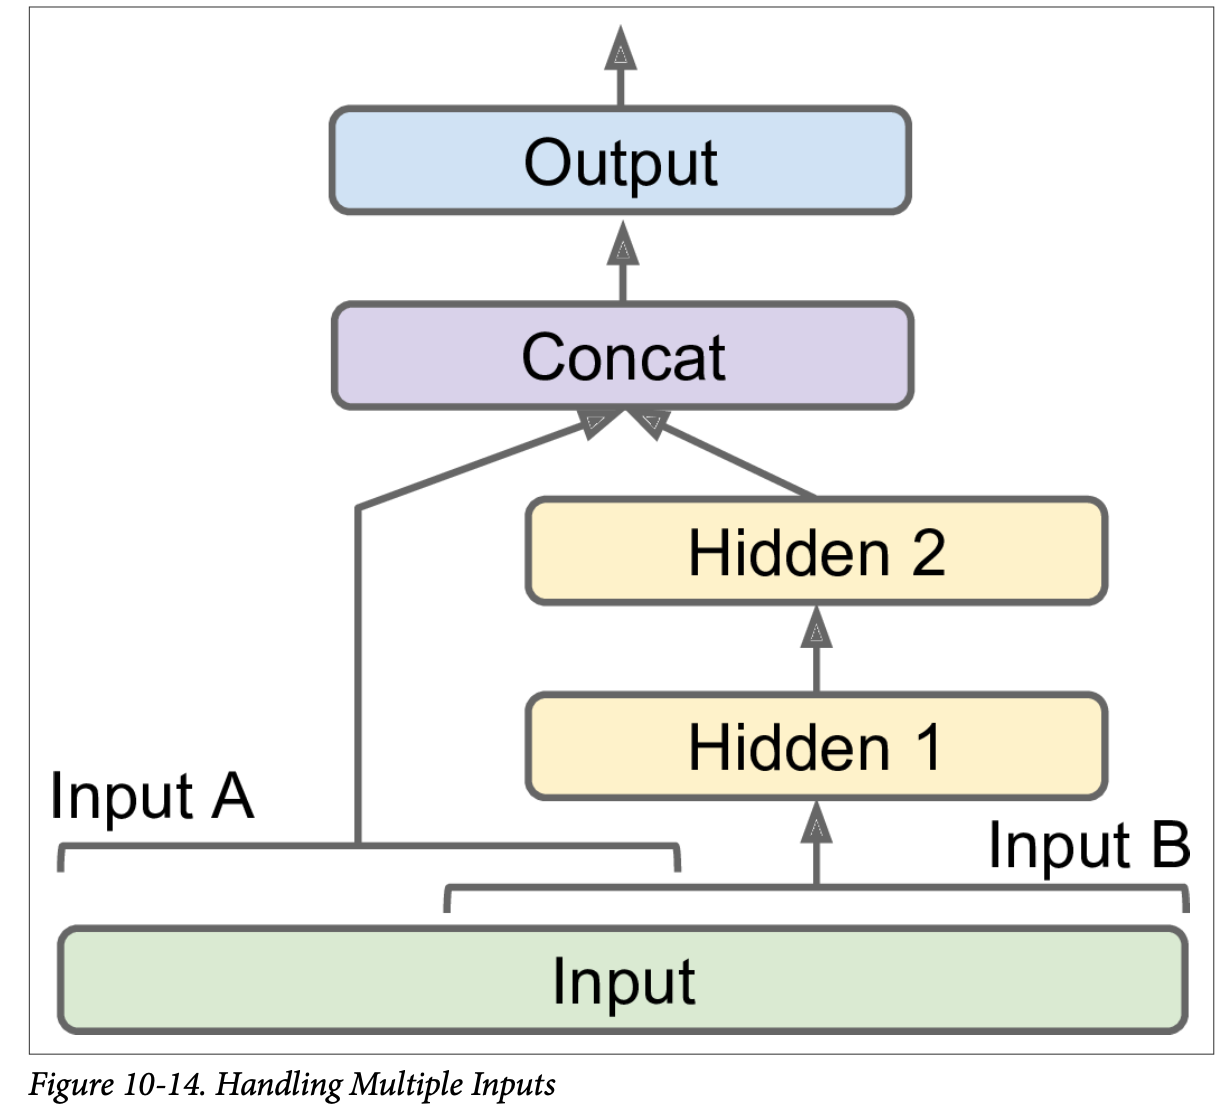

Instead of passing a single input matrix X_train to the fit() method, you can pass in two matrices: (X_train_A, X_train_B):

In [6]:
model.compile(loss = "mse", optimizer = "sgd")

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluation((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

AttributeError: 'Functional' object has no attribute 'evaluation'

There are also situations where you may want to have multiple outputs:

* e.g. if you want to locate & classify the main object in a picture --this is both a regression (coordinates fo teh object's cneter, width, height) and a classification task. 

* e.g. you may have miultiple independent tasks to perform based on the same dataset. Instead of training one neural network per task, you will get the best results by training a single neural network w/ one output per task. 

* e.g. another use case is a regularization technique. For instance, you could add some auxiliary outputs in a nerual network architecture to ensure the underlying part of the netwrok learns something useful on its own --see the code and image below: 

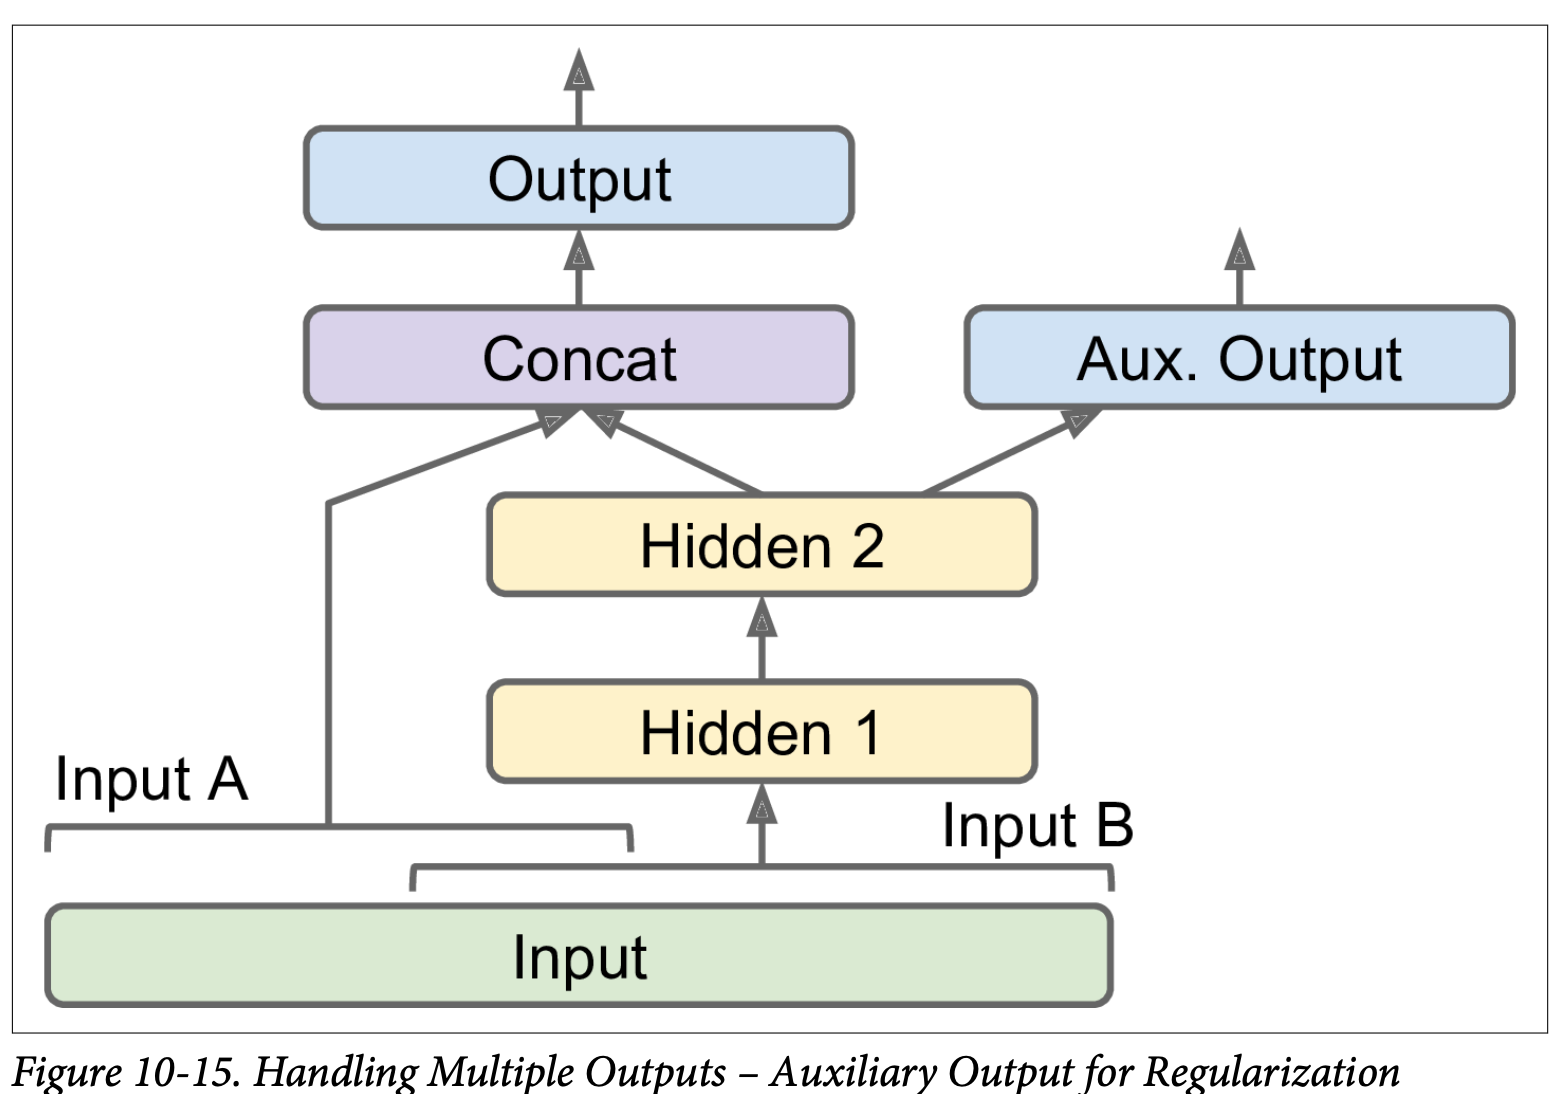

In [7]:
# Adding extra outputs is simple, just connect them to the appropriate layers and add them 
# to your model's list of outputs. 

input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)  # Everything up to here is the same as before
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_A, input_B],
                          outputs = [output, aux_output])

TypeError: Inputs to a layer should be tensors. Got: <keras.layers.merge.Concatenate object at 0x7f9d4ef1b730>

Each output will need its own loss function, so when we compile the model, we should pass a list of losses. By default, keras coputes all thes losses and adds them up to get the final loss used for trianing. But, since we care more about the main output than the aux output, we want to assign higher weight to the main output's loss:


In [8]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")


Now when training the model, we need to provide labels for the outputs. Since the main output and the aux output attempt to predict the same thing, we used pass int eh same labels:


In [10]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20, 
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

In [11]:
# When evaluating the model, Keras returns the total loss and the individual losses:

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 838us/step - loss: nan


TypeError: cannot unpack non-iterable float object

In [12]:
# Similary, the predict() method will return predictions for each output. 

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

ValueError: too many values to unpack (expected 2)

## Building dynamic models using the subclassing API

The Sequential and Function APIs are declarative --you explicitly declare which layers you want to use and how they should be connected.

Though the declarative method it is pretty straight forward and easier to debug, it sacrafices dynamism --some models invovle loops, varying shapes, conditional branching, and other dynamic behaviors. 

To make a dynamic model, subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want to use in the call() method. 

If we want to program the equivalent of the functional model we created earlier while using the functional method, we can do the following: 



In [8]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., names)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

This e.g. code looks like functional API, except in this case we don't have to create the inputs -- we just use the input arg to the call() method, and we separate the creation of the layers in the cunstructor from their usage in the call() method. 

The biggest difference is that we can pretty much do anything we want in the call() method --for loops, if-statements, low-level tensorflow ops. 

But, the flexibiility comes at a cost --your model's architecture is hidden within the cal() function. You can't easiy inspect, so you are prob just better off using sequentional API or the functional API. 

Okay, now that we covered hwo to build and train neural nets using keras, we want to learn how to save them now. 

## Saving and Restoring A Model

It is very simple to save a model (see below). Keras saves both the model's architecture --includes every layer's hyperparameter) and the value of the all the model parameters for every layer (e.g. connection weights and biases) in the HDF5 format. It also saves the optimizer. 

You will usually have a script that trains a model and saves it, as well as one or more script (or web service) that load the model and uses it to make predictions.




In [9]:
# Saving a training Keras model

model.save("my_keras_model.h5")

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [10]:
# Loading the model -- this will work for seq and function api but not for model subclassing

model = keras.models.load_model("my_keras_model.h5")



OSError: No file or directory found at my_keras_model.h5

When training takes a long time --which it will when training large datasets -- you should not only save your model at the end of training but also periodically throughout training. 

How can you save checkpoints? You can tell the fit() method to save the checkpoints by using callbacks. 

## Using Callbacks

The fit() method accepts callbacks arugment that lets you specify a list of objects that keras will call during the training at the start and the end of each epoch and even before and after processing each batch. 

E.g. the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training by default at the end of each epoch. 


In [14]:
 [...] #build and compile the model

checkpont_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

If you use a validation set during trianing, you can set save_best_only = True when creating the ModelCheckpoint. 

This way, it will save your mdmoel when its performance on the validation set is the best so far --upshot: you don't need to worry about training for too long or overfitting. Simply restore the last model saved after training, and this will be the best model on the training validation set. See code for implementation: 


In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10,
                   validation_data = (X_valid, y_valid), 
                   callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # ROLLBACK TO THE BEST MODEL 

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Anothe way to implement early stopping is use EarlyStopping callback. It It will interrupt training when there is no more progress on the validation set for a number of epoch (defined by the patience arg). 

You can combine both callbacks to save checkpoints of your model --incase you comp shuts down randomly -- and actually interrupt training early when there is no more progress --to avoid wasting time and resources. 



In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

the number of epochs can be set to a large number since triaing will stop automatically when there is no more progress. MOreover, there is no need to restore the best model since EarlyStopping callback will keep track of the best weights and restore thme for us at the end of training. 

If you need extra control, you can also just make a custom callback. 

## Visualization Using Tensor Board 

Let's look at one more V helpful tool called TensorBoard!!

TensorBoard is a great interactive visualziation tool for deeplearning models. 

To use it, you need to modify your program so that it outputs the data you want ot visualize to special binary log files called *event files*. Each binary record file is called a *summary*. The TensorBoard server will monitor the log directory and automatically pick up the changes and update the visualizations --this allows you to visualize live data (with a short delay) such as learning curves during training.


In [20]:
# this is just some code to help set up the specifications for TensorBoard
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., ./my_logs/run_2019_01_16-11_28_43'


the good news is that Keras provides a nice TensorBoard callback (see code below)

In [21]:
[...] # buildk and compile your model 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid), 
                   callbacks = [tensorboard_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

If you run the code above, the TensorBoard callback will take care of creating the log directory and durign training it will create event files and write summaries for them. It will give you a log like the following: 

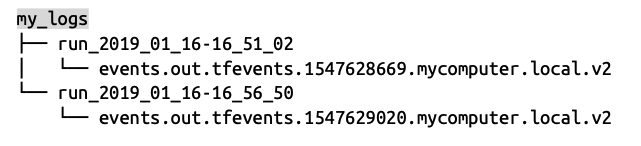

Next you'll need to start teh TensorBoard server. If you isntalled the TensorFlow wihtin your virtualenv, you should activate it. 

Next, run the code below at the root of the project. If you shell can't find the tensorboard script, then you need to update your PATH environemnt variable so thta it has the directory in which the script was installed. 

$ tensorboard --logdir = ./my_logs --port = 6006
TensorBoard 2.0.0 at http://mycomputer.local:6006, (Press CTRL+ C to quit)

Finally, open up a web browser to http://localhost:6006. You should see the TensorBoard's web interface. 
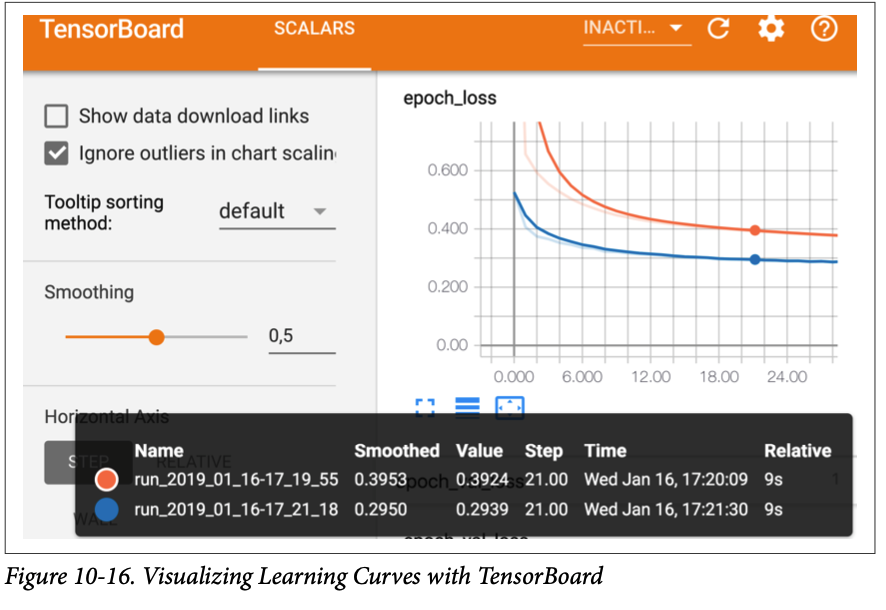

## A quick summary interlude

So far in this chapter we learned:

1. origin of the neural network
2. what an MLP is + how to use it for classification and regression problems
3. How to build MLPs using tf.keras Sequaential API 
4. More complex architectures using the Functional API or MODEL subclassing
5. How to save and restore a model using callbacks to create checkpoints, early stopping ect.
6. How to visual the learning using TensorBoard 

Now, we are going to cover some more details like how to choose the number of hiden layers, the number of neurons in the network, and all the hyperparameters. 

# Fine-Tuning Neural Network Hyperparamters

Since nerual networks are so flexible, there are a lot hyperparamters that you must reckon with. So, how do you know what combination of hyperparameters. is the best for your task? 

One option it o try many different combos to see which ones have the highest performance on the validation set. To do this, we can use GridSerachCV or RandomizationSerachCV to explore the hyperparamter space like we did in CH2. We need to wrap our Keras models in objects that mimic regular SK regressors. 



In [22]:
# The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters

def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]): 
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss  = "mse", optimizer = optimizer)
    return model

this function creats a Sequential model for univariate regrssion --only one output neuron -- w/ the given inpuit shape and number of hidden layres and nerons, and it compiles using tehe SGD optimizer configured w/ the given learning rate. The optinosn dict is used to ensure tha tfirst layer is give the proper input shape. 

It is good practice to provide reasonable defaults for as many hyperparamters as you can --just like how Sklearn does. 



In [24]:
# Let's create a KerasRegression based on this build_model() fucntion:

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-24-3f0301ef4efb>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


The kerasRegressor object is a thin wrapper around the Keras mdoel built using the build_model(). Now we can use this object like a regular SK learn regressor: we can train it usign its fit() method, then evaluate it using its score() method, then use the predict() method. 

note: any extra parameter you pas tot he fit() method will get passed to hte underlying KEras model. 

note: the score will bde the oppostie of the MSE b/c SKlearn wants scores, not loss (ie. higher should be better). 

In [28]:
keras_reg.fit(X_train, y_train, epochs = 100,
             validation_data = (X_valid, y_valid), 
              callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score (X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 0s 996us/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 879us/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 890us/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 910us/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 889us/step - loss: nan - val_loss: nan
Epoch 10/100
162/162 [==============================] - 0s 659us/step - loss: nan


NameError: name 'X_new' is not defined

However, we don't want to train and evaluate a single model like this --we want to train hundreds of variants and see which one performs best on the validation set. There are many hyperparameters, it is prefereable to use random search rather than grid search. 

Let's try to explore the number of hidden layers, the number of neruons, and the learning rate"

In [32]:
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": n.arange(1, 100), 
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience=10)])

NameError: name 'n' is not defined

Ask you can see, this is what we did Ch 2, except, when we passed extra parameters to the fit() method.: they simply get relayed to the underlying Keras model. 

notes: randomizedserachcv uses k-foldcross-validation so it does not use X_valid and y_valid. These are just used for early stopping. 

The exploration may take a long time depending on the hardware that you use and the size of the data set, and the complexity of the model.



In [34]:
# To access the best parameters found, you can type the follow commands:

rnd_search_cv.best_params_
rnd_serach__cv.best_score_
model = rnd_search_cv.best_estimator_.model

NameError: name 'rnd_search_cv' is not defined

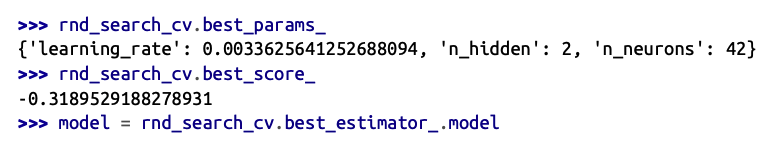

YOu can now save this model, evaluate it oin the test set, and if you like the performance, deploy it for production. 

There is also a list on page 318 of differnt python programs that further help w/ hyperparameter tuning. 

You could also outsource hyperparameter tuning to big tech companies like Good Cloud ML engine. 

## Number of Hidden Layers. 

the number of input and output neurons are usually obvious based on the nature of the problem and dataset. Eg. MNIST required 28 x28 input neurons and 10 output neurons. 


the number of hidden layers and the neurons inside is more of a dark art. Soemtimes, it could hellp to make the first hidden layer bigger than the others. 

just like for layers, you can try to increase the number of neruons graudually until the networks starts overfitting. 

In general, yoiu will get more bang for the buck by increasing the number layers thna the number of neurons per layer. 

A more simple approach is to pick a model w/ more layers and neurons than you actually need, then use the early stopping to prevent it from overfitting --the 'stretch pants' approach. 

## learning rate and Batch size

Beyond number of hidden layers and neurons, there are other immportant hyperparameters to specify:

1. the learning rate: arguably the most important hyperparameter, you want it to be able half the max learning rate (above which the training algo diverges). Here are the steps: 1. start w/ a large value that makes the training algo diverge, then divide this value by 3 and try again, then repeat until the training algo stops diverging. At this point, you generally won't be too far from teh optimal learning rate.

2. Chose a better optimizer than plain mini-batch Gradient Descent. 

3. Batch size can have a significant impact on your model's performance and the trianing time. You don't want it to be too big ('friends don't let friends use mini-baatches larger than 32')

4. The choice of activation function we talked about earlier --generally, you want to the ReLU for hte all hidden layers. Output layer really depends on your task. 

5. The number of training iteratiosn does not actually need to be tweaked, just use early stopping instead. 

